# Dataset Download

In [1]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [2]:
#Download your api kaggle.jdon from kaggle and upload it here
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"navinbondade23","key":"1e8e85d548f349b67f2e015da44880bd"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d noulam/tomato

 99% 736M/743M [00:07<00:00, 81.2MB/s]
100% 743M/743M [00:07<00:00, 106MB/s] 


In [5]:
#unziping the file
from zipfile import ZipFile
file_name = '/content/tomato.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


# Libraries 

In [6]:
import tensorflow as tf

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, BatchNormalization, MaxPool2D, Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

# Data Visualization

In [9]:
mv '/content/New Plant Diseases Dataset(Augmented)' 'Dataset'

In [22]:
Bacterial_Spot = glob('/content/Dataset/train/Tomato___Bacterial_spot/*.JPG')
Early_Blight = glob('/content/Dataset/train/Tomato___Early_blight/*.JPG')
Late_Blight = glob('/content/Dataset/train/Tomato___Late_blight/*.JPG')
Leaf_Mold = glob('/content/Dataset/train/Tomato___Leaf_Mold/*.JPG')
Septoria_Leaf_Spot = glob('/content/Dataset/train/Tomato___Septoria_leaf_spot/*.JPG')
Spider_Mites = glob('/content/Dataset/train/Tomato___Spider_mites Two-spotted_spider_mite/*.JPG')
Target_Spot = glob('/content/Dataset/train/Tomato___Target_Spot/*.JPG')
Yellow_Leaf_Curl_Virus = glob('/content/Dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/*.JPG') 
Tomato_mosaic_Virus = glob('/content/Dataset/train/Tomato___Tomato_mosaic_virus/*.JPG')
Healthy = glob('/content/Dataset/train/Tomato___healthy/*.JPG')


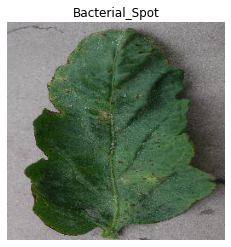

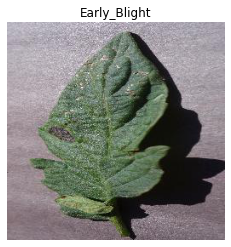

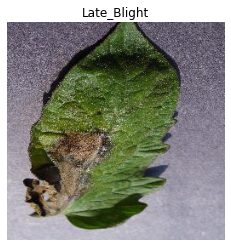

In [28]:
plt.title('Bacterial_Spot')
plt.imshow(image.load_img(np.random.choice(Bacterial_Spot)))
plt.axis('off')
plt.show()

plt.title('Early_Blight')
plt.imshow(image.load_img(np.random.choice(Early_Blight)))
plt.axis('off')
plt.show()

plt.title('Late_Blight')
plt.imshow(image.load_img(np.random.choice(Late_Blight)))
plt.axis('off')
plt.show()

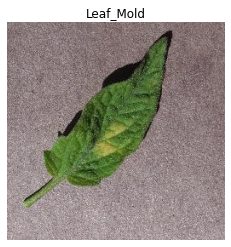

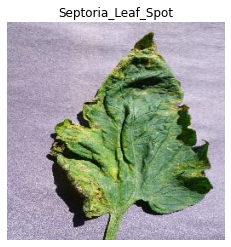

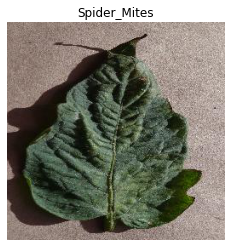

In [29]:
plt.title('Leaf_Mold')
plt.imshow(image.load_img(np.random.choice(Leaf_Mold)))
plt.axis('off')
plt.show()

plt.title('Septoria_Leaf_Spot')
plt.imshow(image.load_img(np.random.choice(Septoria_Leaf_Spot)))
plt.axis('off')
plt.show()

plt.title('Spider_Mites')
plt.imshow(image.load_img(np.random.choice(Spider_Mites)))
plt.axis('off')
plt.show()

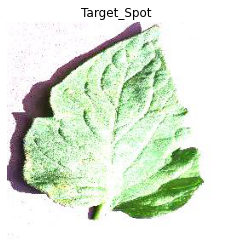

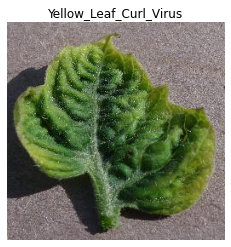

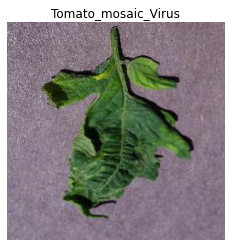

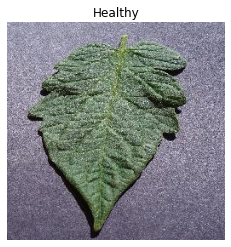

In [30]:
plt.title('Target_Spot')
plt.imshow(image.load_img(np.random.choice(Target_Spot)))
plt.axis('off')
plt.show()

plt.title('Yellow_Leaf_Curl_Virus')
plt.imshow(image.load_img(np.random.choice(Yellow_Leaf_Curl_Virus)))
plt.axis('off')
plt.show()

plt.title('Tomato_mosaic_Virus')
plt.imshow(image.load_img(np.random.choice(Tomato_mosaic_Virus)))
plt.axis('off')
plt.show()

plt.title('Healthy')
plt.imshow(image.load_img(np.random.choice(Healthy)))
plt.axis('off')
plt.show()

# Pre-Processing

In [10]:
img_width = 200
img_height = 200

datagen = ImageDataGenerator(rescale=1/255.0, validation_split = 0.2)

In [ ]:
train_data_gen = datagen.flow_from_directory(directory='/content/New Plant Diseases Dataset(Augmented)/train',
                                             target_size = (img_width, img_height),
                                             class_mode = 'sparse')

Found 18345 images belonging to 10 classes.


In [ ]:
vali_data_gen = datagen.flow_from_directory(directory='/content/New Plant Diseases Dataset(Augmented)/valid',
                                            target_size = (img_width, img_height),
                                             class_mode = 'sparse',)

Found 4585 images belonging to 10 classes.


In [ ]:
print('Labels')
print(np.unique(train_data_gen.labels))
print(np.unique(vali_data_gen.labels))

print('\nTotal Labels')
print(len(np.unique(train_data_gen.labels)))
print(len(np.unique(vali_data_gen.labels)))

Labels
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]

Total Labels
10
10


# Deep Convolutional Model

In [ ]:
model = Sequential()

#convolution 
model.add(Conv2D(32, (3,3), input_shape = (img_width, img_height, 3), activation='relu', padding='same'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(192, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(2,2))

#Dense 
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))


model.add(Dense(228, activation='relu'))
model.add(Dropout(0.3))



model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
r = model.fit_generator(generator=train_data_gen, 
                              steps_per_epoch=len(train_data_gen),
                              epochs=10, 
                              validation_data= vali_data_gen, 
                              validation_steps = len(vali_data_gen))

Epoch 1/10
574/574 [==============================] - 51s 89ms/step - loss: 1.4811 - accuracy: 0.4695 - val_loss: 0.7962 - val_accuracy: 0.7326
Epoch 2/10
574/574 [==============================] - 51s 88ms/step - loss: 0.8161 - accuracy: 0.7157 - val_loss: 0.5265 - val_accuracy: 0.8168
Epoch 3/10
574/574 [==============================] - 51s 88ms/step - loss: 0.6247 - accuracy: 0.7859 - val_loss: 0.3701 - val_accuracy: 0.8691
Epoch 4/10
574/574 [==============================] - 51s 89ms/step - loss: 0.4944 - accuracy: 0.8332 - val_loss: 0.3394 - val_accuracy: 0.8931
Epoch 5/10
574/574 [==============================] - 51s 89ms/step - loss: 0.3964 - accuracy: 0.8645 - val_loss: 0.3043 - val_accuracy: 0.9032
Epoch 6/10
574/574 [==============================] - 50s 87ms/step - loss: 0.3301 - accuracy: 0.8904 - val_loss: 0.3223 - val_accuracy: 0.8938
Epoch 7/10
574/574 [==============================] - 50s 87ms/step - loss: 0.2799 - accuracy: 0.9075 - val_loss: 0.2320 - val_accuracy:

# Analysis

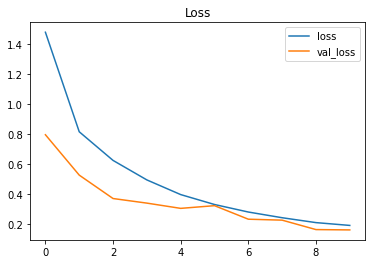

In [ ]:
plt.title('Loss')
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

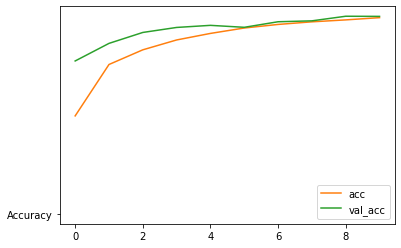

In [ ]:
plt.plot('Accuracy')
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# Model Saving

In [ ]:
model.save('tomato_disease.h5')

In [ ]:
model = tf.keras.models.load_model("tomato_disease.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open('tomato_disease.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp2n3j6l3k/assets


INFO:tensorflow:Assets written to: /tmp/tmp2n3j6l3k/assets


15546416